In [573]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features 
y = abalone.data.targets 
  
# metadata 
print(abalone.metadata) 
  
# variable information 
print(abalone.variables) 


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [574]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10,6)})

In [575]:
X.isna().sum() #nie mamy braków danych

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
dtype: int64

In [576]:
X.describe() 

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [577]:
X.dtypes #mamy 7 zmiennych numerycznych

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
dtype: object

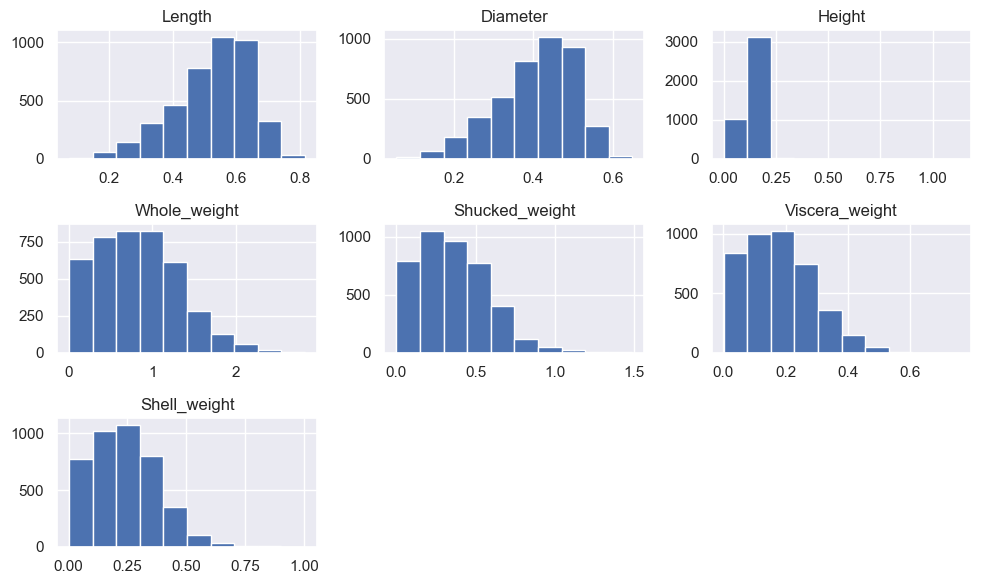

In [578]:
X.hist() 
plt.tight_layout()

<Axes: >

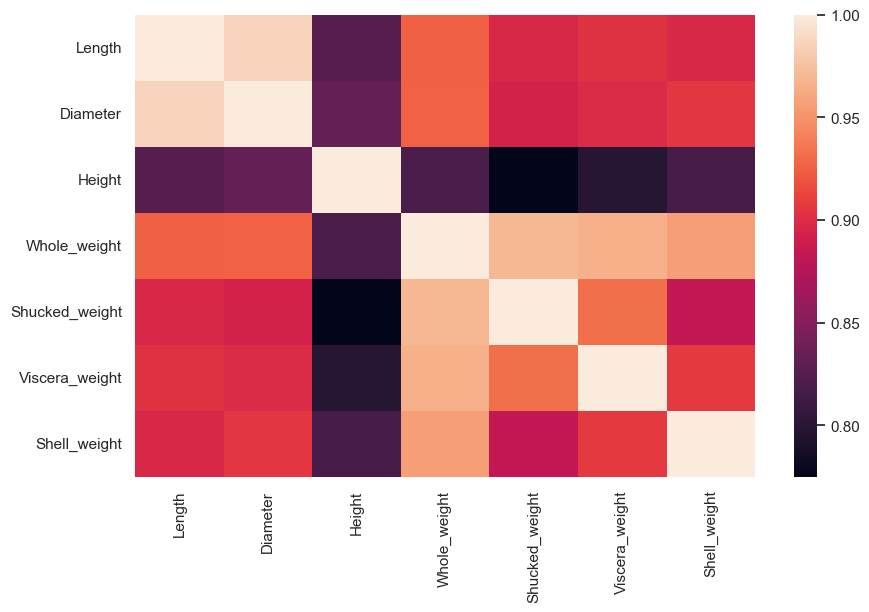

In [579]:
import seaborn as sns
sns.heatmap(X.drop(columns='Sex').corr()) #silna korelacjia miedzy zmiennymi

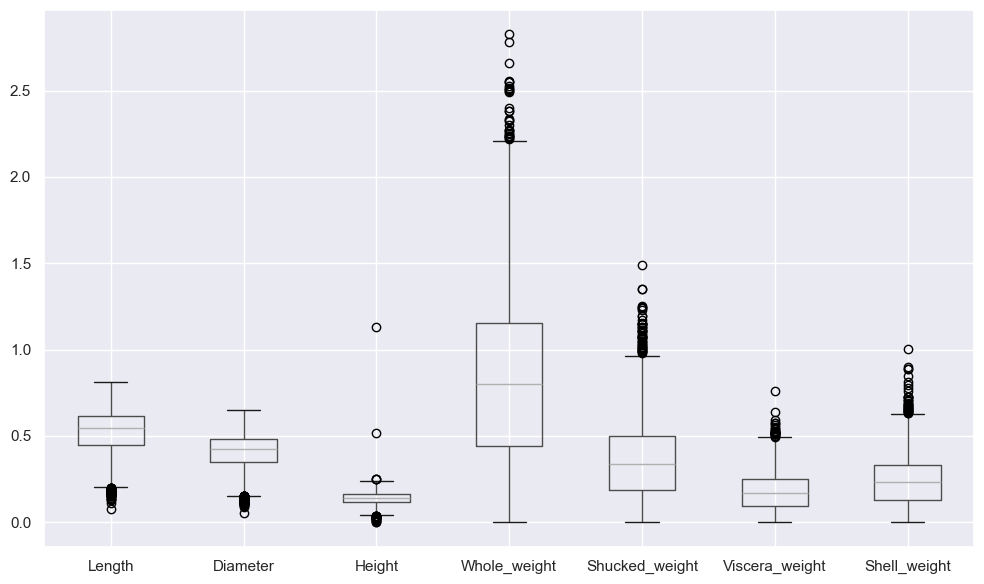

In [580]:
X.boxplot() #widać, że mamy kilka outlierów
plt.tight_layout()

In [582]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

X['Sex'] = label_encoder.fit_transform(X['Sex'])

C:\Users\kjani\AppData\Local\Temp\ipykernel_8396\2446337063.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = label_encoder.fit_transform(X['Sex'])


In [584]:
# import numpy as np

# X_no_outliers = X.copy()

# columns_to_check = X.columns[X.columns != 'Sex']

# for col in columns_to_check:
#     Q1 = X[col].quantile(0.25)
#     Q3 = X[col].quantile(0.75)
    
#     IQR = Q3 - Q1
    
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     X_no_outliers = X_no_outliers[(X_no_outliers[col] >= lower_bound) & (X_no_outliers[col] <= upper_bound)].reset_index(drop=True)

# X_scaled = X_no_outliers.copy()

def drop_outliers(df, columns):
    for col in columns:
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - 1.5*IQR
        upper_boundary = df[col].quantile(0.75) + 1.5*IQR
        df = df.loc[(df[col] >= lower_boundary) & (df[col] <= upper_boundary)].reset_index(drop=True)
    return df

X_no_outliers = drop_outliers(X, X.columns)
X_scaled = X_no_outliers.copy()


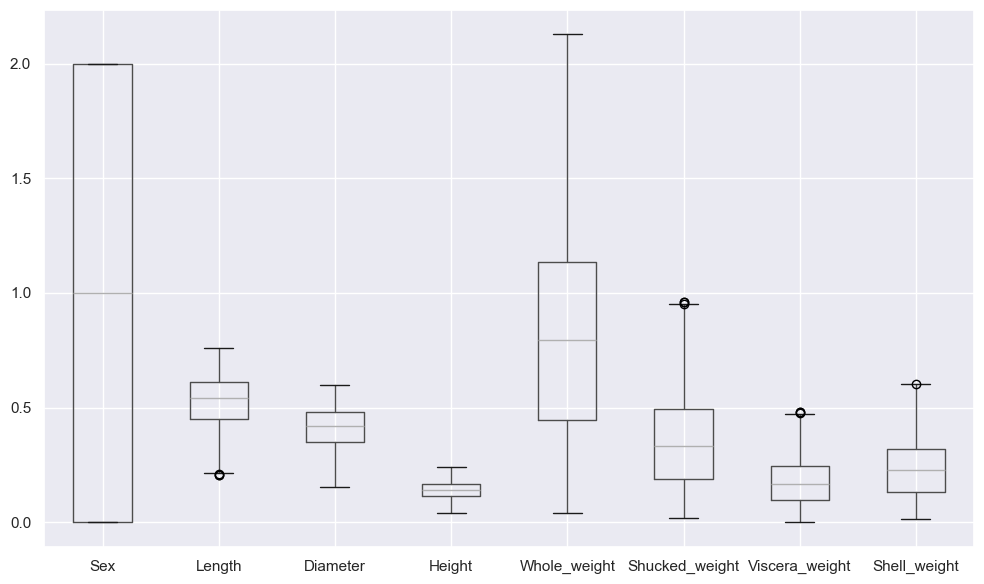

In [585]:
X_no_outliers.boxplot() #widać, że nie mamy outlierów
plt.tight_layout()

In [586]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
cols = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=cols)
scaler = StandardScaler()
X_no_outliers = scaler.fit_transform(X_no_outliers)
X_no_outliers = pd.DataFrame(X_no_outliers, columns=cols)

array([[<Axes: title={'center': 'Rings'}>]], dtype=object)

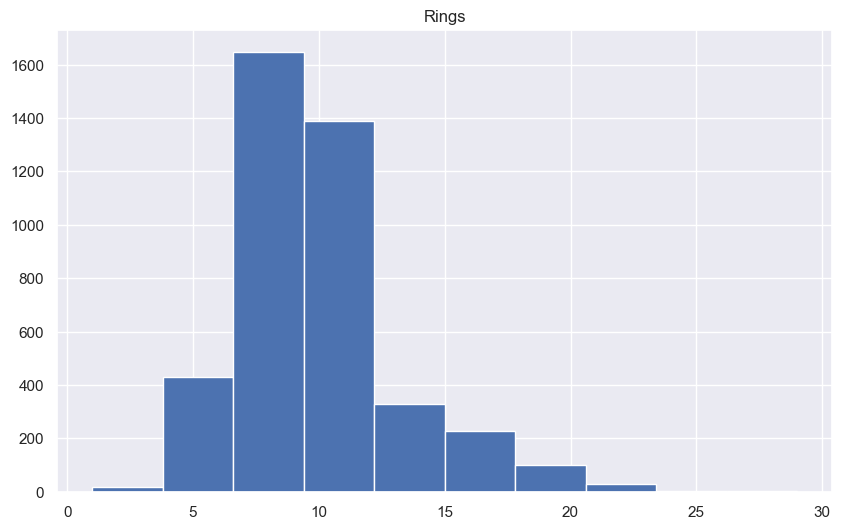

In [587]:
y.hist() 

In [588]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans_labels = kmeans.fit_predict(X)

silhouette = silhouette_score(X, kmeans_labels)

dbi = davies_bouldin_score(X, kmeans_labels)

harabasz = calinski_harabasz_score(X, kmeans_labels)

dbscan = DBSCAN(eps=0.5, min_samples=5)

dbscan_labels = dbscan.fit_predict(X)

dbi_dbscan = davies_bouldin_score(X, dbscan_labels)
silhouette_dbscan = silhouette_score(X, dbscan_labels)
harabasz_dbscan = calinski_harabasz_score(X, dbscan_labels)

table_outliers = [["K-Means", silhouette, dbi, harabasz], ["DBSCAN", silhouette_dbscan, dbi_dbscan, harabasz_dbscan]]

c:\Users\kjani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [606]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import tabulate

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans_labels = kmeans.fit_predict(X_no_outliers)

silhouette = silhouette_score(X_no_outliers, kmeans_labels)

dbi = davies_bouldin_score(X_no_outliers, kmeans_labels)

harabasz = calinski_harabasz_score(X_no_outliers, kmeans_labels)

dbscan = DBSCAN(eps=0.5, min_samples=5)

dbscan_labels = dbscan.fit_predict(X_no_outliers)

dbi_dbscan = davies_bouldin_score(X_no_outliers, dbscan_labels)
silhouette_dbscan = silhouette_score(X_no_outliers, dbscan_labels)
harabasz_dbscan = calinski_harabasz_score(X_no_outliers, dbscan_labels)

table = [["K-Means", silhouette, dbi, harabasz], ["DBSCAN", silhouette_dbscan, dbi_dbscan, harabasz_dbscan]]
print('No outliers:')
print(tabulate.tabulate(table, headers=["Method", "Silhouette", "Davies-Bouldin Index", "Calinski-Harabasz Score"], tablefmt="pretty"))
print('With outliers:')
print(tabulate.tabulate(table_outliers, headers=["Method", "Silhouette", "Davies-Bouldin Index", "Calinski-Harabasz Score"], tablefmt="pretty"))

c:\Users\kjani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


No outliers:
+---------+----------------------+----------------------+-------------------------+
| Method  |      Silhouette      | Davies-Bouldin Index | Calinski-Harabasz Score |
+---------+----------------------+----------------------+-------------------------+
| K-Means |  0.4504155154253388  |  0.7166707760012966  |    7813.044104733796    |
| DBSCAN  | -0.24694875359944435 |  1.659642214549716   |   119.56641102306592    |
+---------+----------------------+----------------------+-------------------------+
With outliers:
+---------+----------------------+----------------------+-------------------------+
| Method  |      Silhouette      | Davies-Bouldin Index | Calinski-Harabasz Score |
+---------+----------------------+----------------------+-------------------------+
| K-Means |  0.3480322143325431  |  1.0172902433396696  |    4141.042220061347    |
| DBSCAN  | -0.09524132602905465 |  1.9101190473598402  |    574.9188234812461    |
+---------+----------------------+--------------

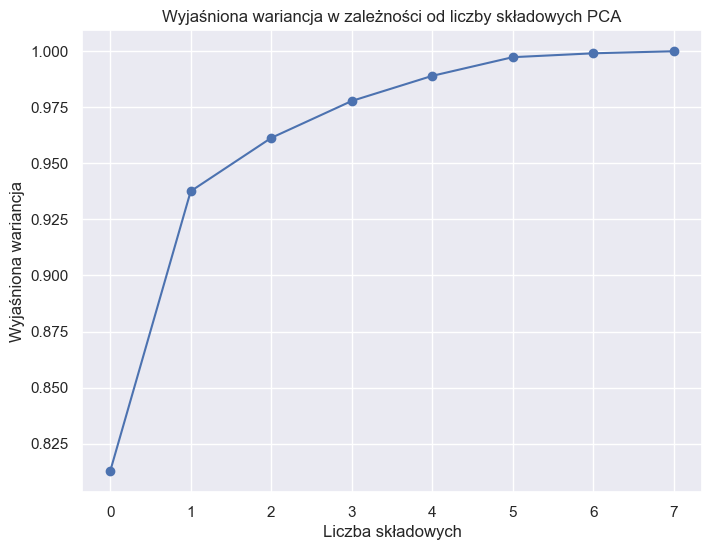

In [591]:
import numpy as np
pca = PCA(n_components=2)
pca = PCA().fit(X_no_outliers)
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='-', color='b')
plt.xlabel('Liczba składowych')
plt.ylabel('Wyjaśniona wariancja')
plt.title('Wyjaśniona wariancja w zależności od liczby składowych PCA')
plt.grid(True)
plt.show()

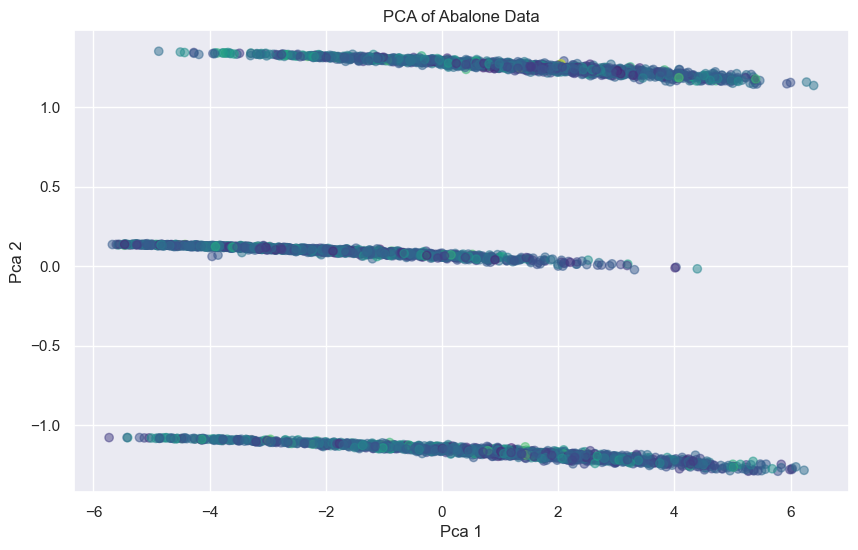

In [592]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_no_outliers)
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca['target'] = y
plt.figure(figsize=(10, 6))
plt.scatter(X_pca['PC1'], X_pca['PC2'], c=X_pca['target'], alpha=0.5, cmap='viridis')
plt.xlabel('Pca 1')
plt.ylabel('Pca 2')
plt.title('PCA of Abalone Data')
plt.grid(True)
plt.show()

c:\Users\kjani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


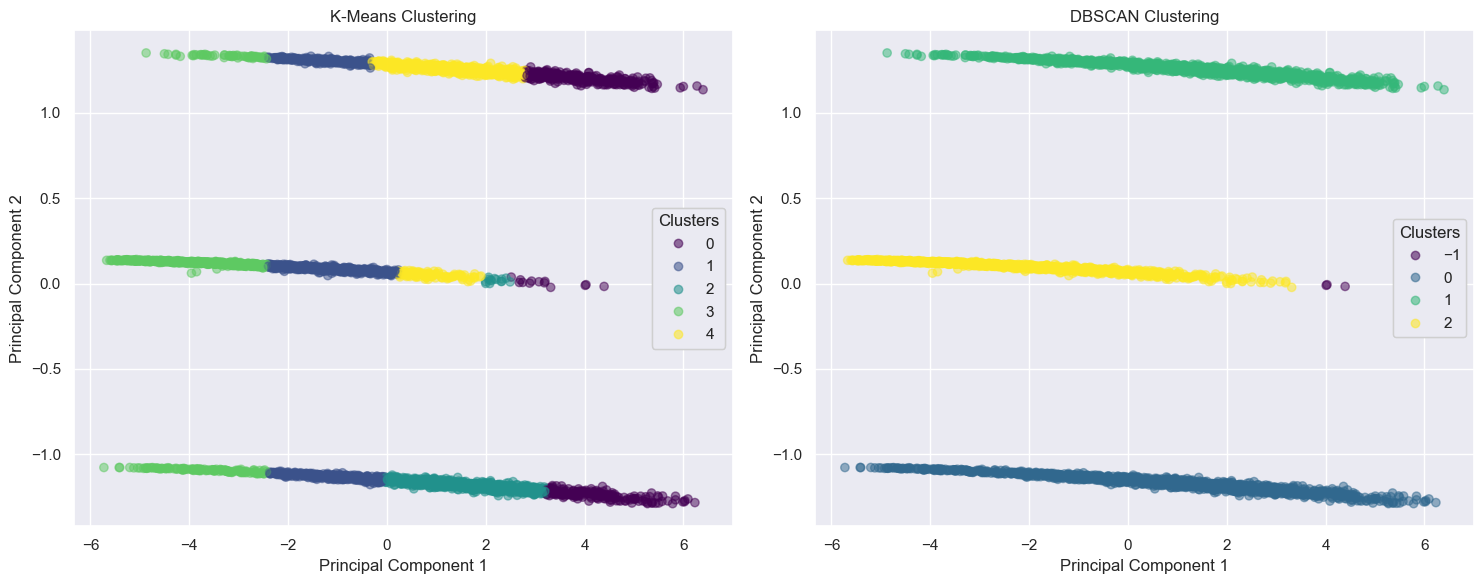

In [593]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_no_outliers)
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

dbscan = DBSCAN()
dbscan_labels = dbscan.fit_predict(X_pca)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca['PC1'], X_pca['PC2'], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.grid(True)
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.subplot(1, 2, 2)
scatter2 = plt.scatter(X_pca['PC1'], X_pca['PC2'], c=dbscan_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering')
plt.grid(True)
legend2 = plt.legend(*scatter2.legend_elements(), title="Clusters")
plt.gca().add_artist(legend2)

plt.tight_layout()
plt.show()

c:\Users\kjani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


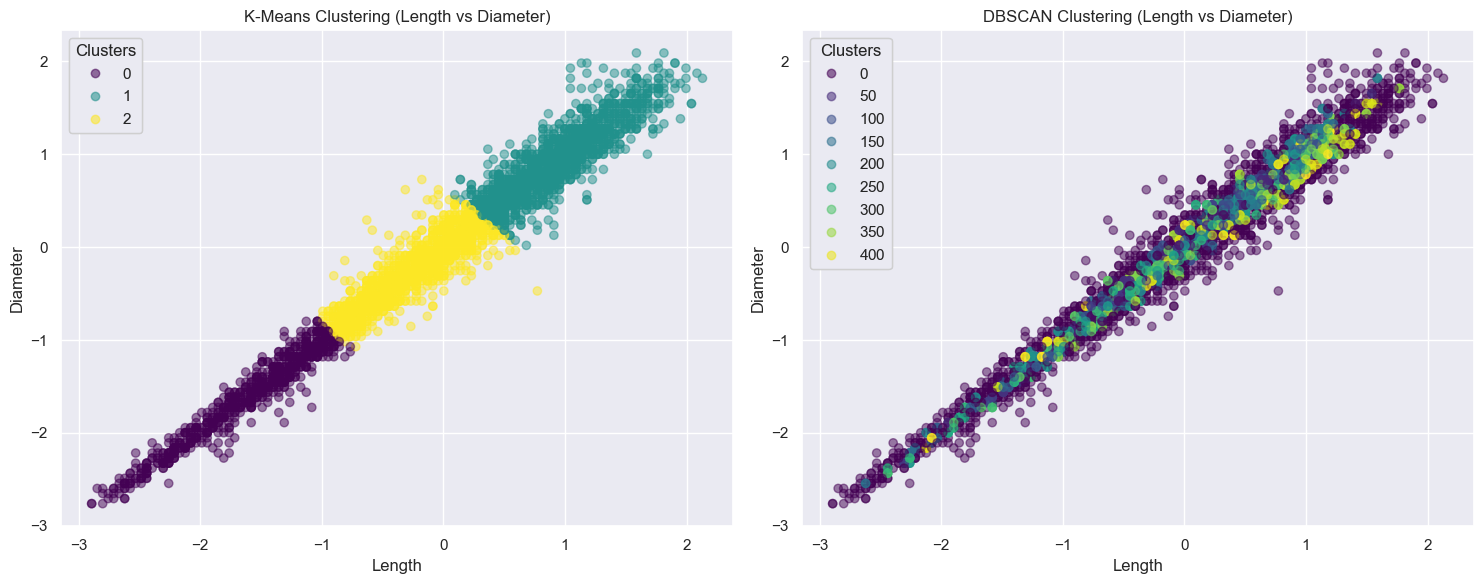

In [602]:
data = X_no_outliers[['Length', 'Diameter']]

kmeans_2d = KMeans(n_clusters=3, random_state=42)
kmeans_labels_2d = kmeans_2d.fit_predict(data)

dbscan_2d = DBSCAN(eps=0.03, min_samples=4)
dbscan_labels_2d = dbscan_2d.fit_predict(data)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
scatter = plt.scatter(data['Length'], data['Diameter'], c=kmeans_labels_2d, cmap='viridis', alpha=0.5)
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title('K-Means Clustering (Length vs Diameter)')
plt.grid(True)
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.subplot(1, 2, 2)
scatter2 = plt.scatter(data['Length'], data['Diameter'], c=dbscan_labels_2d, cmap='viridis', alpha=0.5)
plt.xlabel('Length')
plt.ylabel('Diameter')
plt.title('DBSCAN Clustering (Length vs Diameter)')
plt.grid(True)
legend2 = plt.legend(*scatter2.legend_elements(), title="Clusters")
plt.gca().add_artist(legend2)

plt.tight_layout()
plt.show()

In [598]:
X_no_outliers.drop(columns='Sex', inplace=True)

In [599]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(X_scaled, columns=X_no_outliers.columns)
X_scaled = scaler.fit_transform(X_scaled)

c:\Users\kjani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kjani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kjani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kjani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

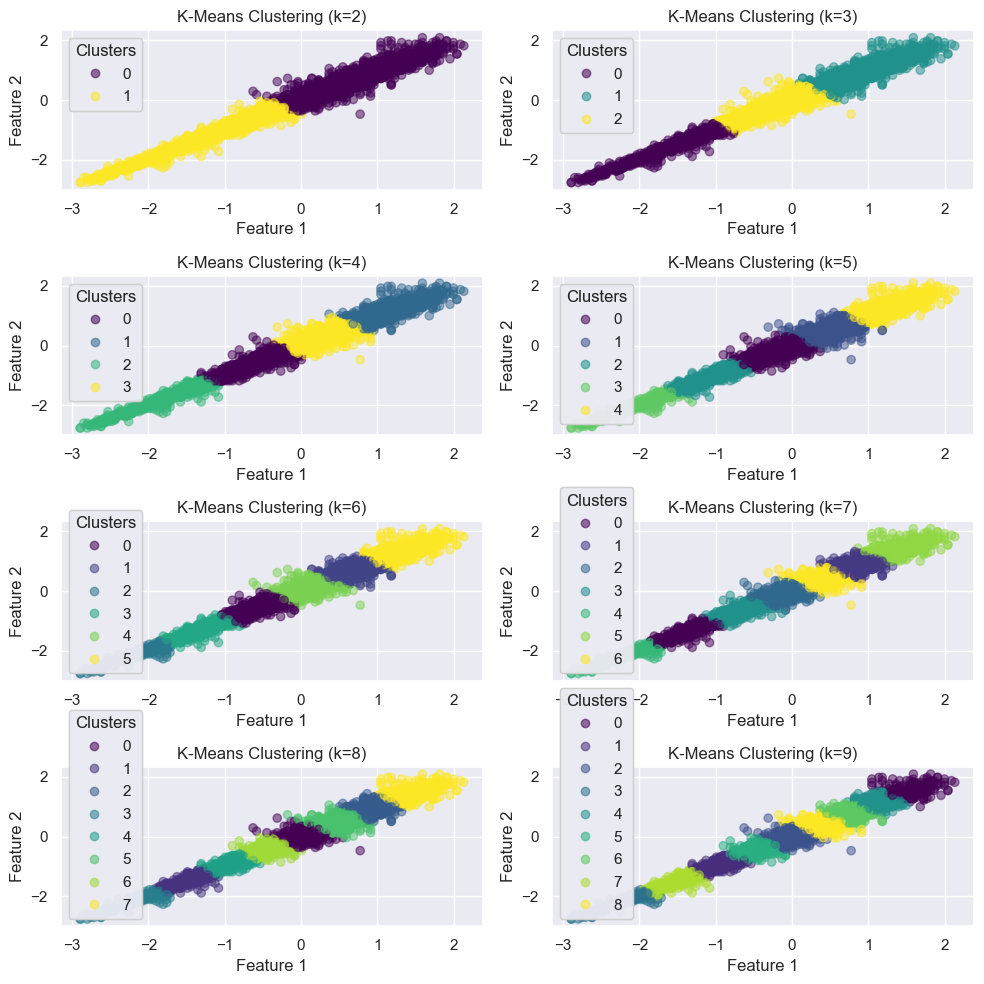

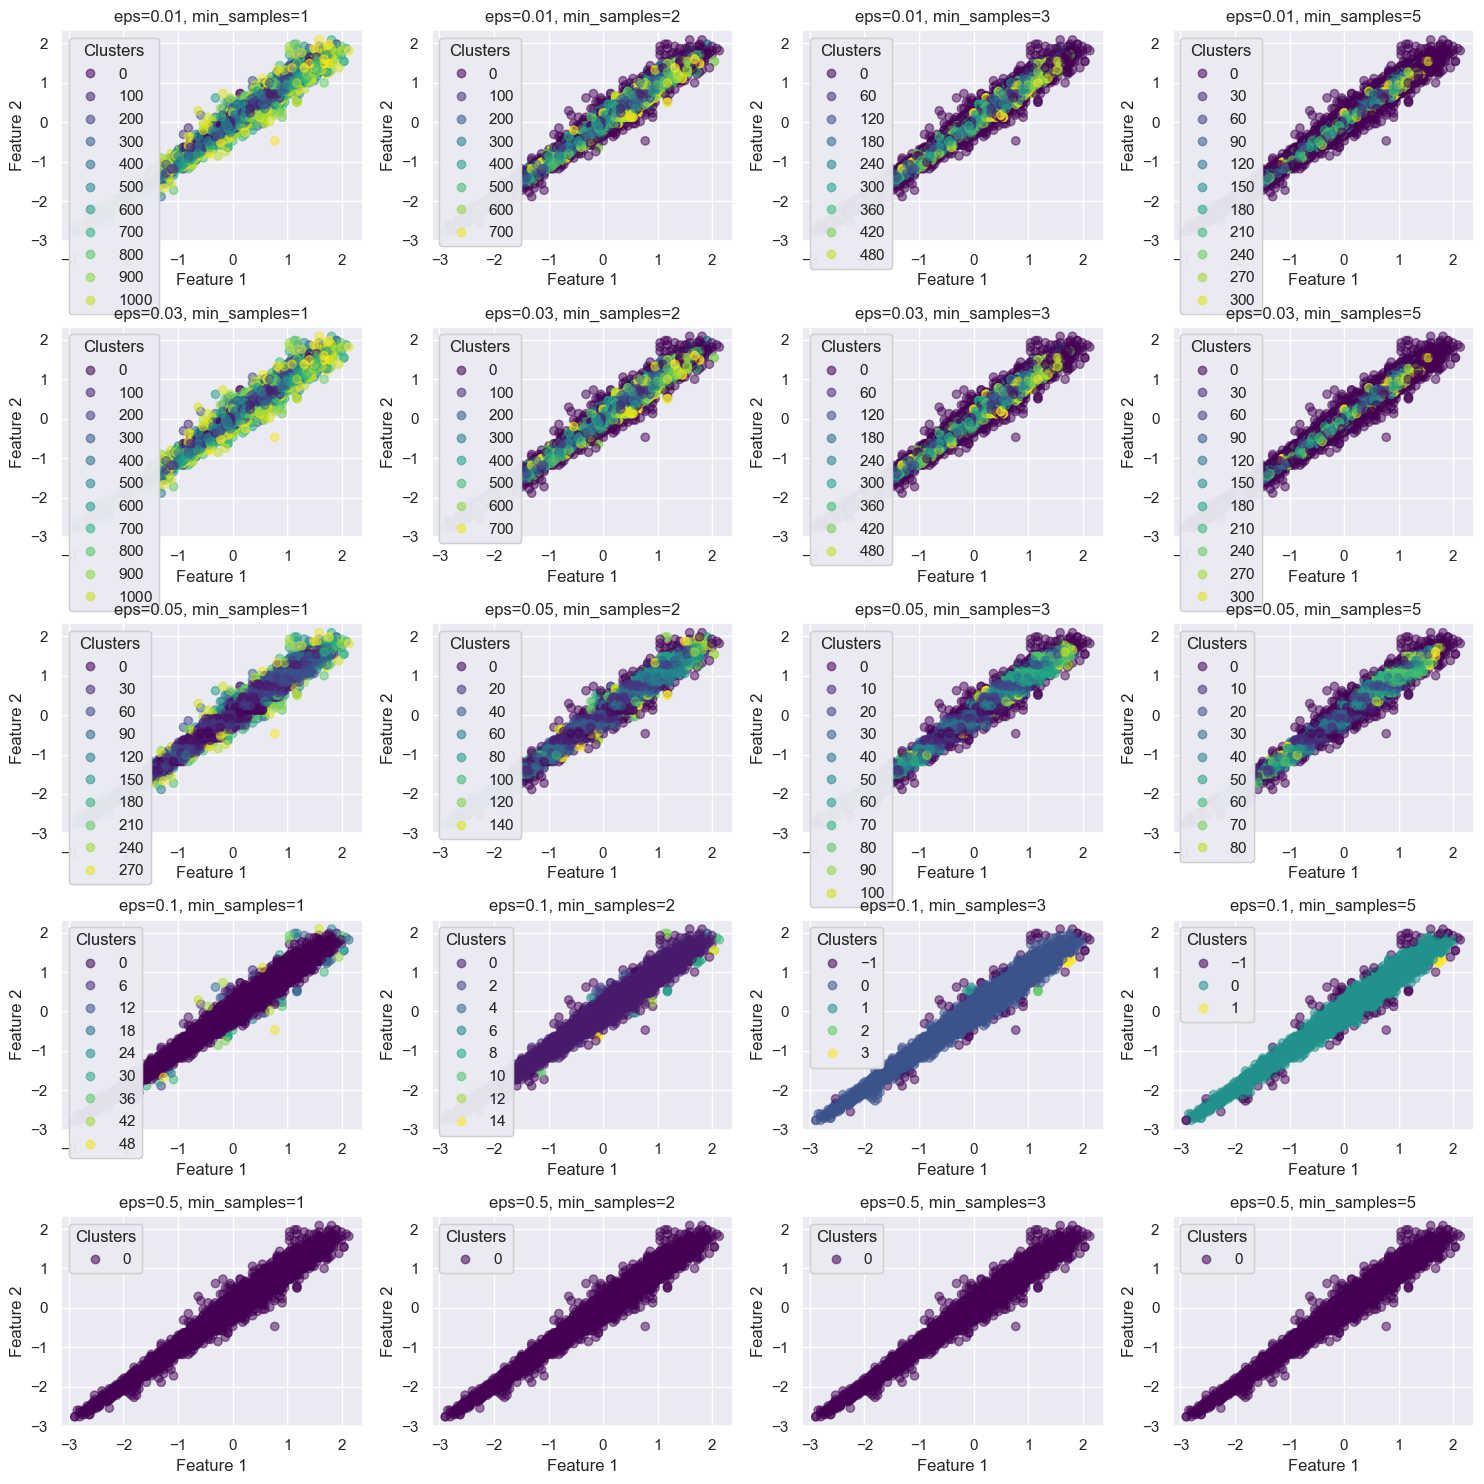

In [604]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Dla K-Means: różne liczby klastrów
k_values = [2, 3, 4, 5, 6, 7, 8, 9]
fig, axs = plt.subplots(4, 2, figsize=(10, 10))
for i, k in enumerate(k_values):
    row = i // 2
    col = i % 2
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(data)
    scatter = axs[row, col].scatter(data['Length'], data['Diameter'], c=kmeans_labels, cmap='viridis', alpha=0.5)
    legend1 = axs[row, col].legend(*scatter.legend_elements(), title="Clusters")
    axs[row, col].add_artist(legend1)
    axs[row, col].set_title(f'K-Means Clustering (k={k})')
    axs[row, col].set_xlabel('Feature 1')
    axs[row, col].set_ylabel('Feature 2')
plt.tight_layout()
plt.show()

# Dla DBSCAN: różne wartości eps i min_samples
eps_values = [0.01, 0.03, 0.05, 0.1, 0.5]
min_samples_values = [1, 2, 3, 5]
fig, axs = plt.subplots(5, 4, figsize=(15, 15))
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(data)
        scatter = axs[i, j].scatter(data['Length'], data['Diameter'], c=dbscan_labels, cmap='viridis', alpha=0.5)
        legend1 = axs[i, j].legend(*scatter.legend_elements(), title="Clusters")
        axs[i, j].add_artist(legend1)
        axs[i, j].set_title(f'eps={eps}, min_samples={min_samples}')
        axs[i, j].set_xlabel('Feature 1')
        axs[i, j].set_ylabel('Feature 2')
plt.tight_layout()
plt.show()